# Reading MOD09 granules

In [1]:
%matplotlib widget
import staremaster
import contextily

In [2]:
from pyhdf.SD import SD
import numpy
import pystare
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage
import geopandas

## MOD09

In [3]:
# file_path = '../tests/data/MOD09.A2002299.0710.006.2015151173939.hdf'
file_path = '/Users/mbauer/SpatioTemporal/STAREMaster_py/tests/data/mod09/MOD09.A2002299.0710.006.2015151173939.hdf'
# file_path = '/home/griessbaum/Dropbox/UCSB/spires/colocation/MOD09.A2020032.1940.006.2020034015024.hdf'
granule = staremaster.products.MOD09(file_path)

In [4]:
granule.load()

In [5]:
granule.make_sids(n_workers=4)

/Users/mbauer/miniconda3/envs/stare2/lib/python3.13/site-packages/distributed/client.py:3383: UserWarning: Sending large graph of size 41.94 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/Users/mbauer/miniconda3/envs/stare2/lib/python3.13/site-packages/distributed/client.py:3383: UserWarning: Sending large graph of size 167.77 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


In [6]:
granule.sids['1km'].flatten()[-1]

np.int64(3520522815746171596)

In [7]:
granule.read_gring()
granule.read_latlon()

In [8]:
pystare.spatial_resolution(granule.sids['500m'])

array([[31, 15, 31, ..., 13, 13, 13],
       [31, 15, 31, ..., 13, 13, 13],
       [31, 15, 31, ..., 13, 13, 13],
       ...,
       [31, 15, 31, ..., 13, 13, 13],
       [31, 15, 31, ..., 13, 13, 13],
       [31, 15, 31, ..., 13, 13, 13]], shape=(4060, 2708))

In [9]:
granule.create_sidecar(n_workers=4)

/Users/mbauer/miniconda3/envs/stare2/lib/python3.13/site-packages/distributed/client.py:3383: UserWarning: Sending large graph of size 41.94 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/Users/mbauer/miniconda3/envs/stare2/lib/python3.13/site-packages/distributed/client.py:3383: UserWarning: Sending large graph of size 167.77 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


hdfeos 2882303761517117440 3458764513820540928


In [10]:
sids = staremaster.conversions.latlon2stare(granule.lats['1km'],
                                            granule.lons['1km'],
                                            n_workers=4)

/Users/mbauer/miniconda3/envs/stare2/lib/python3.13/site-packages/distributed/client.py:3383: UserWarning: Sending large graph of size 41.94 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


# Interpolation Plots

In [11]:
granule.get_500m_latlon()

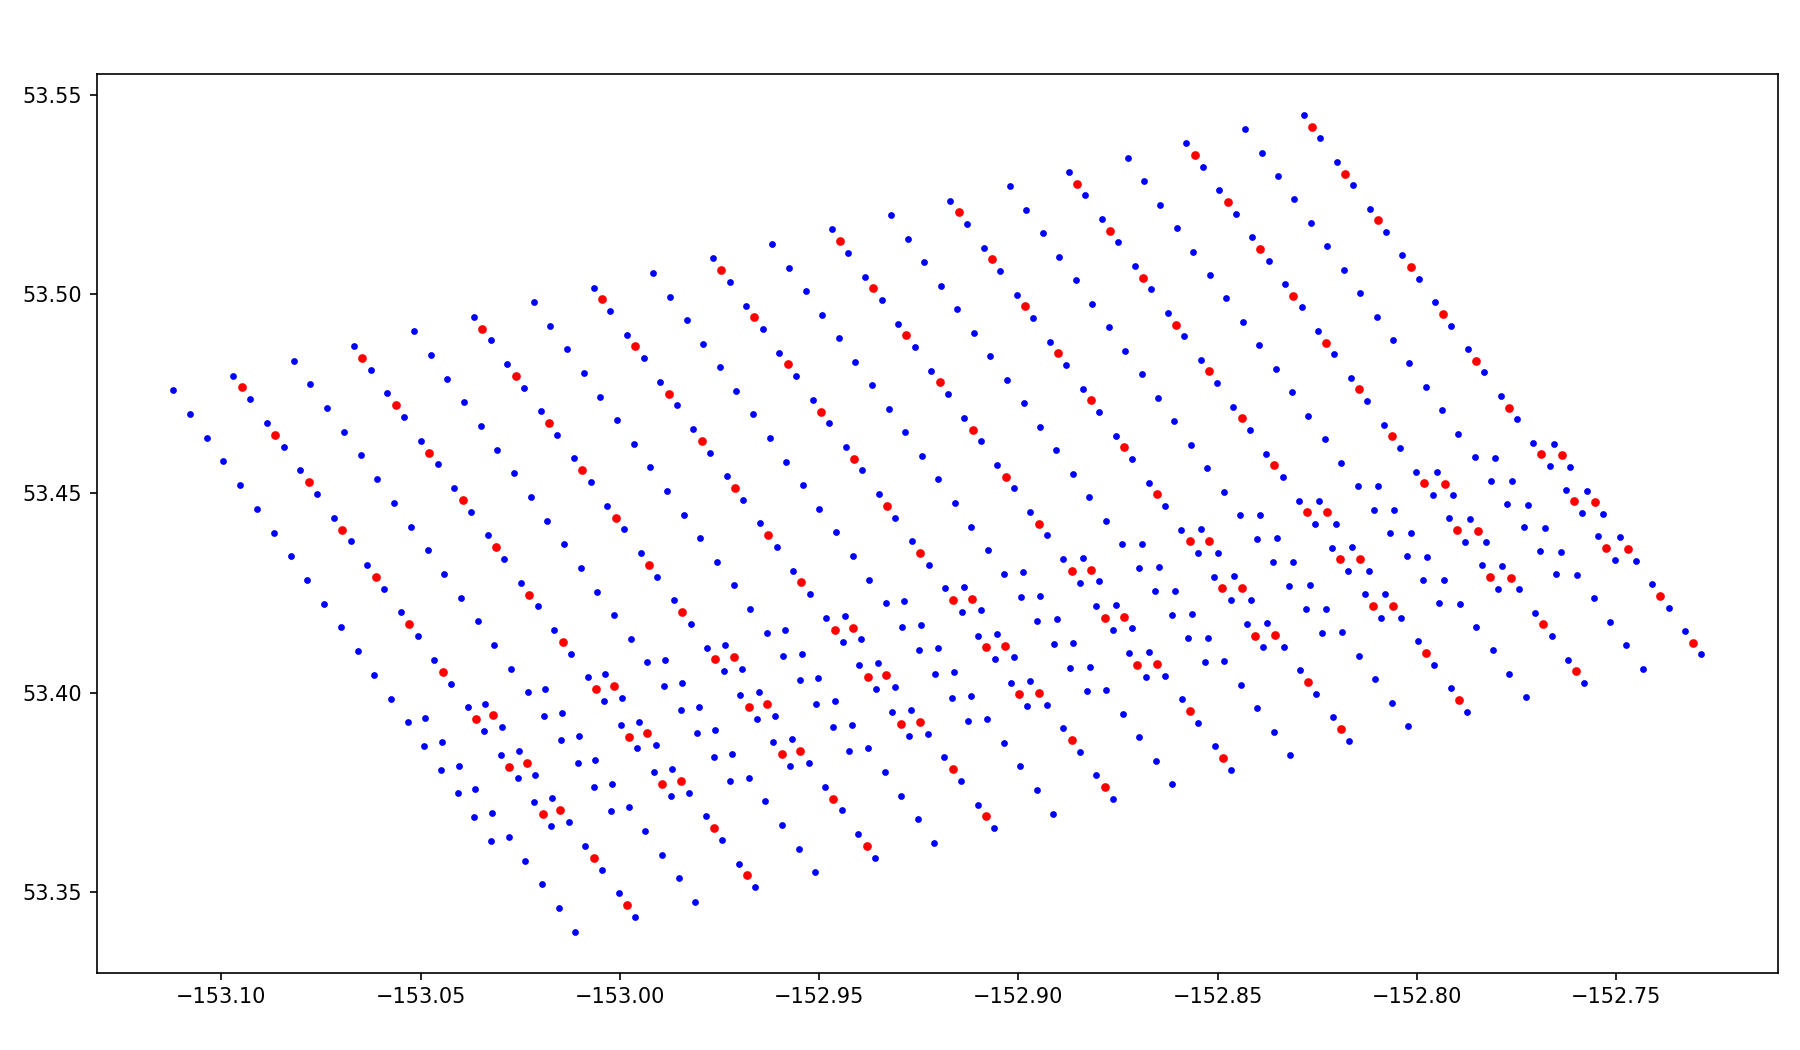

In [12]:
fig = plt.figure(figsize=(12, 7), dpi=150)
ax = fig.add_subplot()
df = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(granule.lons['1km'][-15:, -10:].flatten(),
                                                              granule.lats['1km'][-15:, -10:].flatten()))

df2 = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(granule.lons['500m'][-30:, -20:].flatten(),
                                                               granule.lats['500m'][-30:, -20:].flatten()))

df.plot(ax=ax, color='red', markersize=10)
df2.plot(ax=ax,markersize=5, color='blue')
#contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik, crs=4326)

fig.tight_layout()

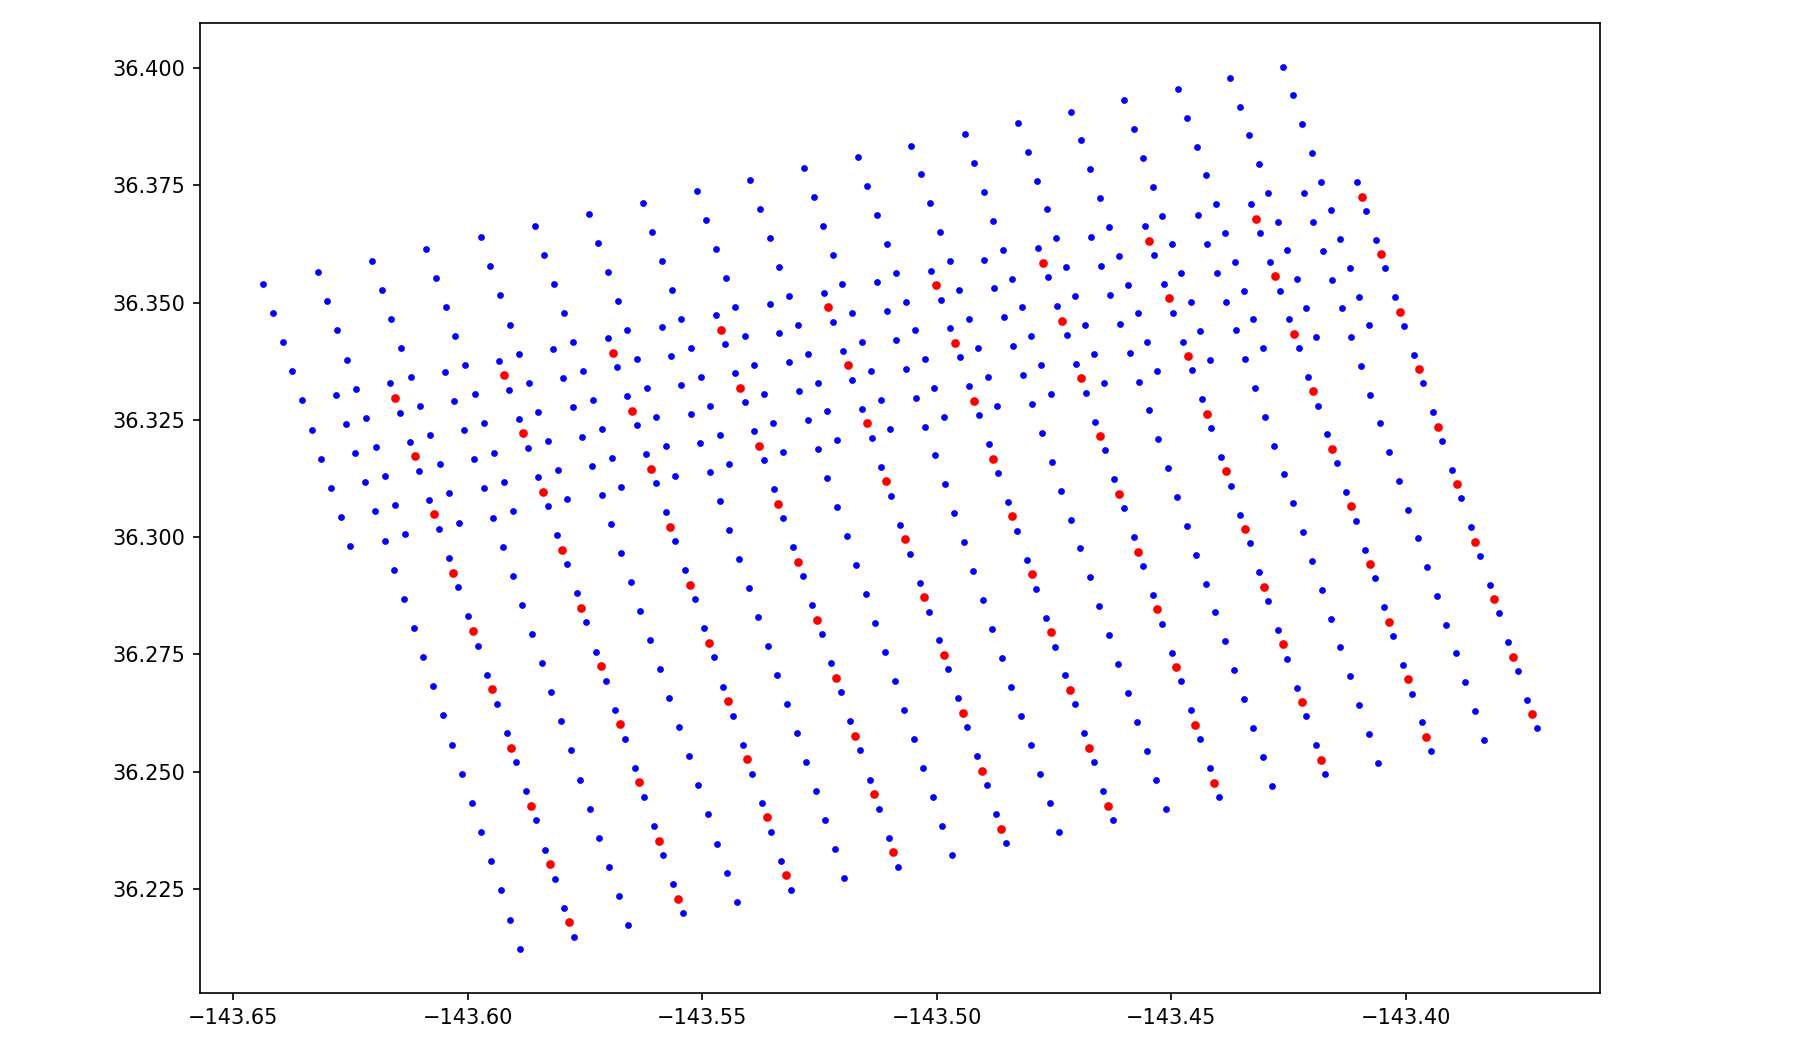

In [13]:
fig = plt.figure(figsize=(12, 7), dpi=150)
ax = fig.add_subplot()

df = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(granule.lons['1km'][0:10, -10:].flatten(),
                                                              granule.lats['1km'][0:10, -10:].flatten()))

df2 = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(granule.lons['500m'][0:30, -20:].flatten(),
                                                               granule.lats['500m'][0:30, -20:].flatten()))

df.plot(ax=ax, color='red', markersize=10)
df2.plot(ax=ax,markersize=5, color='blue')
fig.tight_layout()

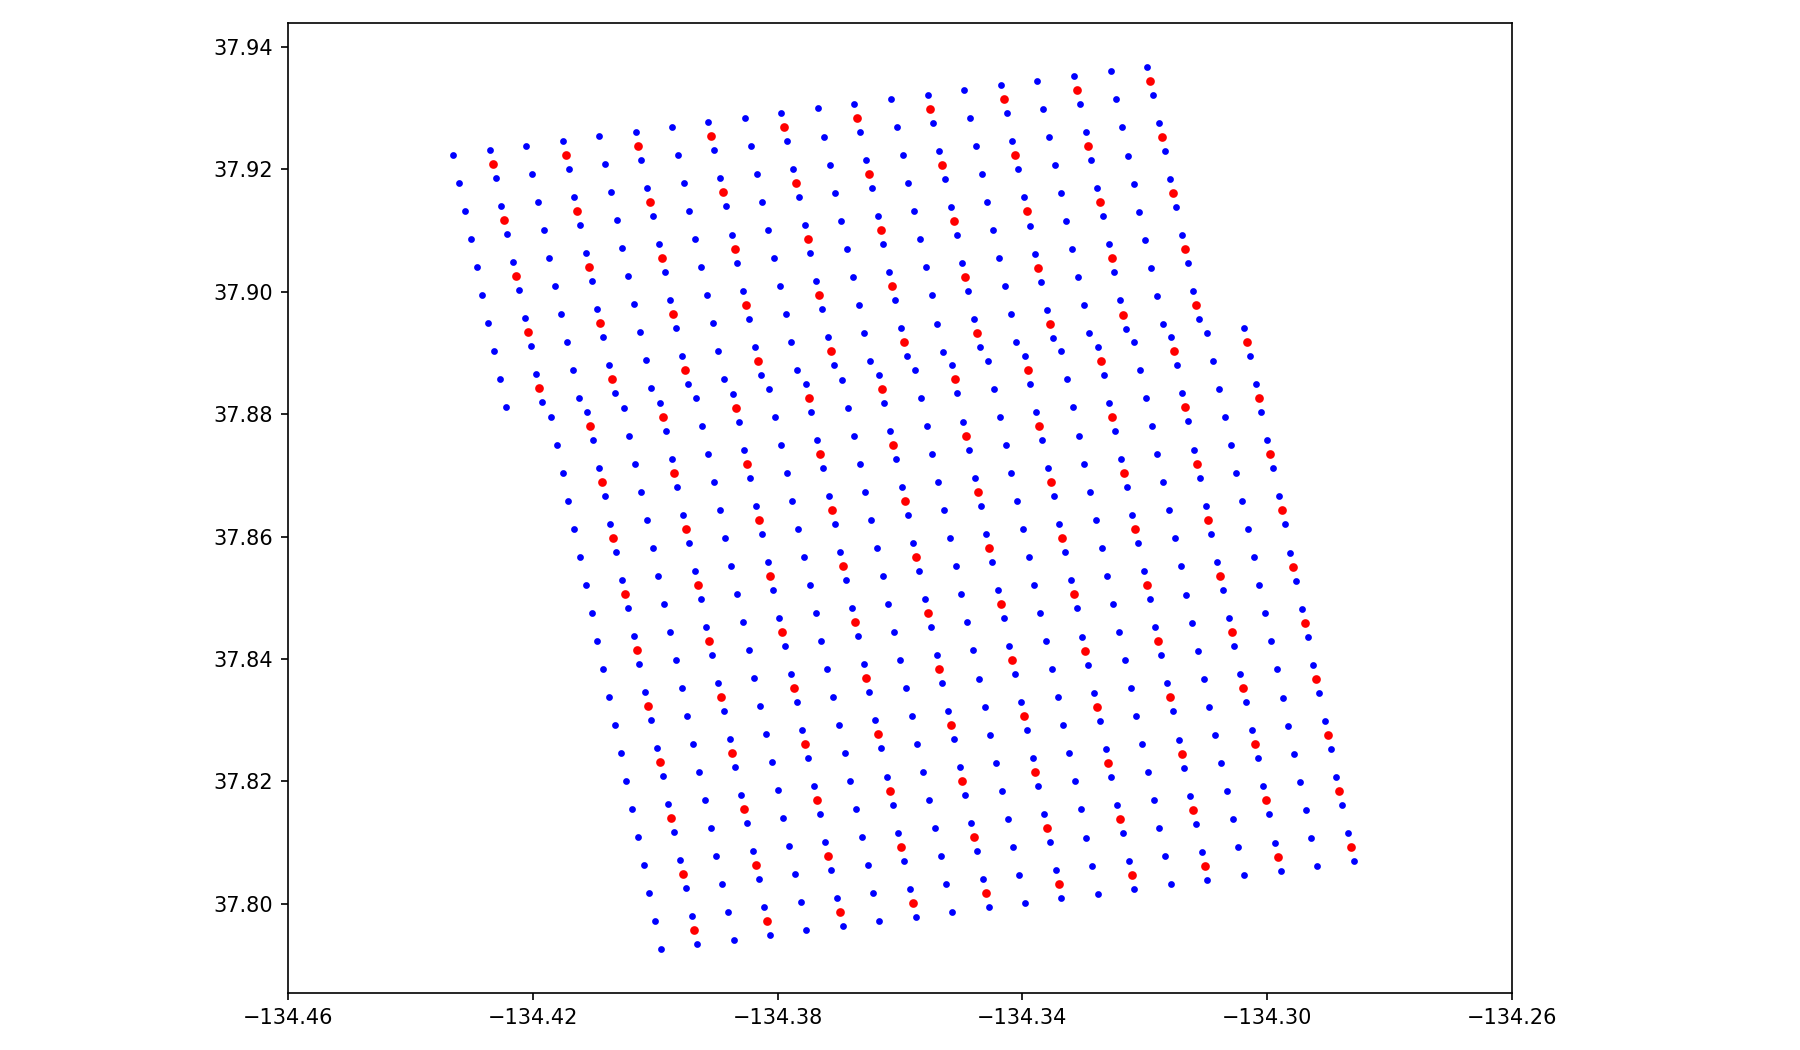

In [14]:
fig = plt.figure(figsize=(12, 7), dpi=150)
ax = fig.add_subplot()

df = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(granule.lons['1km'][0:15, 670:680].flatten(),
                                                              granule.lats['1km'][0:15, 670:680].flatten()))

df2 = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(granule.lons['500m'][0:30, 1340:1360].flatten(),
                                                               granule.lats['500m'][0:30, 1340:1360].flatten()))



df.plot(ax=ax, color='red', markersize=10)
df2.plot(ax=ax,markersize=5, color='blue')

ax.set_xticks(ax.get_xticks()[::2])
fig.tight_layout()

## Test with starepandas

In [15]:
import starepandas
import netCDF4
import numpy
import pandas
import pystare

In [16]:
# file_path = '../tests/data/MOD09.A2002299.0710.006.2015151173939.hdf'
file_path = '/Users/mbauer/SpatioTemporal/STAREMaster_py/tests/data/mod09/MOD09.A2002299.0710.006.2015151173939.hdf'
sdf = starepandas.read_granule(file_path, sidecar=True)


read_granule sidecar_path = None
read_granule granule = <starepandas.io.granules.modis.Mod09 object at 0x319bc3230>


In [17]:
sdf['level'] = pystare.spatial_resolution(sdf['sids'])
# sdf.spatial_resolution()

In [18]:
# sdf.to_stare_resolution(11)

In [19]:
sdf['sids'] = sdf['sids'].astype(numpy.int64)

In [20]:
starepandas.STAREDataFrame(sids=[3520425476210836992, 3520426917205266432, 3520522815746171403]).spatial_resolution()

AttributeError: 'STAREDataFrame' object has no attribute 'spatial_resolution'

In [ ]:
ds =netCDF4.Dataset('../tests/data/MOD09.A2002299.0710.006.2015151173939_stare.nc')

In [ ]:
sids = ds['STARE_index_1km'][:, :]
sids

In [ ]:
#sids = sids.astype(numpy.int64)
sids.flatten()

In [ ]:
pandas.array(sids.flatten(), dtype='UInt64')

In [ ]:
pandas.Series(ds['STARE_index_1km'][:, :].flatten(), dtype='UInt64')